##### Импортирую нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from dateutil import parser
import matplotlib.pyplot as plt 

##### Формирую датасеты

In [2]:
users = pd.read_csv('olist_customers_dataset.csv')

In [3]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [4]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
users.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [9]:
task_1 = orders.query('order_status !="created"').merge(users, on = 'customer_id').groupby('customer_unique_id', as_index=False)

In [10]:
task_1=task_1.order_id.nunique().query('order_id == 1')

In [11]:
task_1.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [12]:
task_1.customer_unique_id.nunique()

93096

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?


"""
1. Отфильтровать заказы со статусом unavailable, canceled
2. Создать колонку с месяцем, рассчитать ее на основе колонки order_purchase_timestamp, взяв только год и месяц
3. Расчитать уникальное количество заказов со статусами unavailable и canceled по месяцам
4. Для каждого статуса рассчитать среднее количество заказов по месяцам
"""

In [13]:
task_2 = orders[orders.order_status.isin(['unavailable','canceled'])].assign(month = lambda row: row.order_purchase_timestamp.str[:7])

In [14]:
task_2=task_2.groupby(['month', 'order_status'], as_index=False).order_id.nunique()

In [15]:
task_2.head()

,month,order_status,order_id
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


In [16]:
task_2.groupby('order_status', as_index = False).order_id.mean()

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.
 
 '''
1. К таблице items приджоинить order_purchase из таблицы orders
2. Из поля order_purchase_timestamp получить номер дня внутри недели (isocalendar)
3. Для каждого товара выделить день, которому соответствует наибольшее количество продаж (va
'''


In [17]:
task_3 = items.merge(orders[['order_id','order_purchase_timestamp']], on = 'order_id', how = 'left')

In [18]:
task_3['day_of_week'] = task_3.order_purchase_timestamp.apply(lambda x: parser.parse(x).isocalendar()[2])

In [19]:
task_3 = task_3.groupby('product_id', as_index = False).day_of_week.agg(lambda x: x.value_counts().index[0])

In [20]:
task_3

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,7
1,00088930e925c41fd95ebfe695fd2655,2
2,0009406fd7479715e4bef61dd91f2462,4
3,000b8f95fcb9e0096488278317764d19,5
4,000d9be29b5207b54e86aa1b1ac54872,2
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,6
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,5
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

'''
1. Рассчитать количество дней для каждого месяца в датасете
2. Выделить количество недель внутри каждого месяца, поделив количество дней на 7
3. Отфилбтровать заказы в статусах, несоответствующих покупке
4. Приджоинить к orders уникальные идентификаторы пользователей
5. Добавить к orders колонку с месяцев покупки
6. Для каждого пользователя внутри месяца рассчитать общее количество заказов
7. К orders приджоинить количество недель по месяцам
8. Поделить количество заказов по пользователям - месяцам на количество недель в месяце

'''




In [21]:
calendar = pd.DataFrame(pd.date_range(orders.order_purchase_timestamp.min()[:10], orders.order_purchase_timestamp.max()[:10]), columns = ['dates'])

In [22]:
calendar.head()

,dates
0,2016-09-04
1,2016-09-05
2,2016-09-06
3,2016-09-07
4,2016-09-08


In [23]:
calendar ['month'] = calendar.dates.apply(lambda x: x.isoformat()[:7])

In [24]:
calendar = calendar.groupby('month', as_index = False).nunique().assign(week_count = lambda x: x.dates / 7)[['month', 'week_count']].head()

In [25]:
task_4 = orders[~orders.order_status.isin(['created'])].merge(users[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left')

In [26]:
task_4 = task_4.assign(month = lambda row: row.order_purchase_timestamp.str[:7]).groupby(['customer_unique_id', 'month'], as_index = False).order_id.nunique()

In [27]:
task_4 = task_4.merge(calendar, on = 'month', how = 'left').assign(orders_weekly_frequency = lambda x: x.order_id / x.week_count)

In [28]:
task_4 = task_4[['customer_unique_id', 'month', 'orders_weekly_frequency']]

In [29]:
task_4.head()

,customer_unique_id,month,orders_weekly_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,NaN
2,0000f46a3911fa3c0805444483337064,2017-03,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,NaN
4,0004aac84e0df4da2b147fca70cf8255,2017-11,NaN


## 5. Используя pandas, необходимо провести когортный анализ пользователей. В период с января по декабрь необходимо выявить когорту с самым высоким retention на 3й месяц

1. Отфильтровать только успешные заказы (created)
2. Добавить информацию из таблицы users об уникальном идентификаторе пользователя
3. Добавить для каждого пользователя его когорту, рассчитанную по месяцу первого заказа
4. С помощью cumcount для каждого заказа внутри кагорты рассчитать порядковый номер месяца 
5. Построить свобдную таблицу с количеством вернувшихся пользователей внутри кагорты на N-ый месяц жизни когорты
6. С помощью div перевести количество пользователей в доли

In [30]:
task_5 = orders[~orders.order_status.isin(['created'])].merge(users[['customer_id', 'customer_unique_id']], on ='customer_id', how = 'left')

In [31]:
task_5['month'] = task_5['order_purchase_timestamp'].apply(lambda x: x[:7])

In [32]:
task_5=task_5.merge(task_5.groupby('customer_unique_id', as_index = False).month.min().rename({'month':'cohort'}, axis = 1), on = 'customer_unique_id', how = 'left')

In [33]:
task_5['ret_month'] = task_5.groupby('customer_unique_id', as_index = False).month.cumcount()

In [34]:
task_5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,month,cohort,ret_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,2018-07,2018-07,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02,0


In [35]:
  task_5['retention'] = 1

In [36]:
task_5 = pd.pivot_table(
    task_5,
    values = 'retention',
    index = 'cohort',
    columns = 'ret_month',
    aggfunc = np.sum
)


In [37]:
task_5=task_5.div(task_5[0], axis=0).fillna(0).drop(0, axis=1)

In [38]:
task_5

ret_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort,,,,,,,,,,,,,,,,
2016-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,0.037383,0.003115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-12,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,0.075916,0.013089,0.002618,0.001309,0.001309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02,0.041667,0.003995,0.000571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03,0.049317,0.006449,0.001138,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04,0.045918,0.004252,0.000425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-05,0.055061,0.007786,0.001669,0.000834,0.000834,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278
2017-06,0.055113,0.004141,0.000637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Преобразуем таблицу, сделаем heatmap 

<AxesSubplot:xlabel='ret_month', ylabel='cohort'>

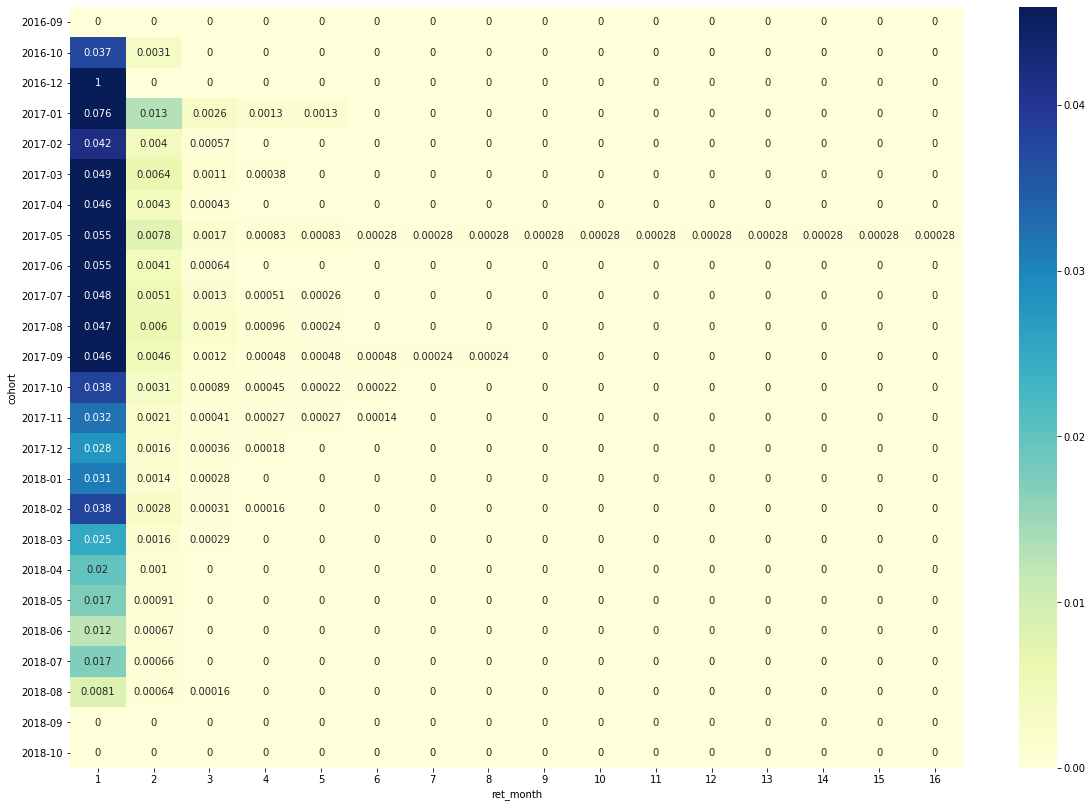

In [39]:
plt.figure(figsize=(20,14))
sns.heatmap(task_5, robust = True, annot = True, cmap = 'YlGnBu')

## 6. Используя python, постройте RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.В кластеризации можно выбрать следующие метрики:
##### * R - время от последней покупки пользователя до текущей даты. 
##### * F - суммарное количество покупок у пользователя за всё время.
##### * M - сумма покупок за всё время.

1. Выбрать метрику расчета RFM-кластеров:
R - время в днях с последнего заказа, 
F - количество заказов за все время, 
M - общая сумма покупок за всех время
2. Выбрать кластеризацию: разбиение по квартилям этих метрик
3. Рассчитать время от каждого заказа до максимально возможного времени внутри датасета
4. Рассчитать стоимость заказа для каждого заказа в данных 
5. Приджоинить стоимость и уникальные id пользователей к данным
6. Для каждого пользователя вычеслить: 
 - срок в днях от его последнего заказа (R)
 - суммарное количество заказов (F)
 - общую сумму заказов (M)
7. С помощью np.digitize присвоить каждому пользователю квартиль внутри метрики

In [40]:
max_date = parser.parse(orders.order_purchase_timestamp.max())

In [48]:
orders['days_to_max'] = list(map(lambda x: x.days, (max_date - orders.order_purchase_timestamp.apply(lambda x: parser.parse(x)))))

In [56]:
task_6 = orders[~orders.order_status.isin(['created'])].merge(users[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

In [57]:
task_6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_max,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,380,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,84,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,70,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,332,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,245,72632f0f9dd73dfee390c9b22eb56dd6


In [72]:
task_6=task_6.merge(items.groupby('order_id', as_index=False).price.sum()).groupby('customer_unique_id', as_index=False).agg({'order_id':'size', 'days_to_max':'min', 'price':'sum'})

In [76]:
intervals_r = list(task_6.days_to_max.describe())[3:]
intervals_f = [1,2,3,16]
intervals_m = list(task_6.price.describe())[3:]

In [78]:
task_6['recency'] = task_6.days_to_max.apply(lambda x: np.digitize(x, intervals_r))
task_6['frequency'] = task_6.order_id.apply(lambda x: np.digitize(x, intervals_f))
task_6['monetary'] = task_6.price.apply(lambda x: np.digitize(x, intervals_m))
task_6['merger_cluster'] = task_6.recency.astype('str') + task_6.frequency.astype('str') + task_6.monetary.astype('str')

In [79]:
task_6.head()

,customer_unique_id,order_id,days_to_max,price,recency,frequency,monetary,merger_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1,160,129.90,1,1,3,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,163,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,1,585,69.00,4,1,2,412
3,0000f6ccb0745a6a4b88665a16c9f078,1,369,25.99,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,1,336,180.00,3,1,4,314


In [80]:
task_6.groupby('merger_cluster', as_index=False)['order_id','days_to_max','price'].mean()

/tmp/ipykernel_56/2479642244.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  task_6.groupby('merger_cluster', as_index=False)['order_id','days_to_max','price'].mean()


,merger_cluster,order_id,days_to_max,price
0,111,1.000000,104.699932,29.157138
1,112,1.000000,103.916477,65.748422
2,113,1.000000,106.716981,118.320479
3,114,1.000000,106.624241,365.723449
4,121,2.000000,102.142857,36.253571
5,122,2.000000,110.510417,70.345417
6,123,2.000000,104.745455,121.330424
7,124,2.000000,106.899083,350.391904
8,132,3.000000,85.000000,72.107500
9,133,3.000000,94.285714,113.071429
